In [43]:
#Question1

In [25]:
import pandas as pd
import math
import numpy as np
import matplotlib
import thinkstats2
import thinkplot


In [26]:
df = pd.read_csv("basketball_players.csv")

In [27]:
df.head(5)

,playerID,year,stint,tmID,lgID,GP,GS,minutes,points,oRebounds,...,PostBlocks,PostTurnovers,PostPF,PostfgAttempted,PostfgMade,PostftAttempted,PostftMade,PostthreeAttempted,PostthreeMade,note
0,abramjo01,1946,1,PIT,NBA,47,0,0,527,0,...,0,0,0,0,0,0,0,0,0,NaN
1,aubucch01,1946,1,DTF,NBA,30,0,0,65,0,...,0,0,0,0,0,0,0,0,0,NaN
2,bakerno01,1946,1,CHS,NBA,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
3,baltihe01,1946,1,STB,NBA,58,0,0,138,0,...,0,0,3,10,2,1,0,0,0,NaN
4,barrjo01,1946,1,STB,NBA,58,0,0,295,0,...,0,0,0,0,0,0,0,0,0,NaN


In [34]:
df.columns

Index([u'playerID', u'year', u'stint', u'tmID', u'lgID', u'GP', u'GS',
       u'minutes', u'points', u'oRebounds', u'dRebounds', u'rebounds',
       u'assists', u'steals', u'blocks', u'turnovers', u'PF', u'fgAttempted',
       u'fgMade', u'ftAttempted', u'ftMade', u'threeAttempted', u'threeMade',
       u'PostGP', u'PostGS', u'PostMinutes', u'PostPoints', u'PostoRebounds',
       u'PostdRebounds', u'PostRebounds', u'PostAssists', u'PostSteals',
       u'PostBlocks', u'PostTurnovers', u'PostPF', u'PostfgAttempted',
       u'PostfgMade', u'PostftAttempted', u'PostftMade', u'PostthreeAttempted',
       u'PostthreeMade', u'note'],
      dtype='object')

In [39]:
#I want to filter to recent year


Df_ = df.loc[df['year'] == 2010]


In [40]:
#Question2
#Here I define the columns I want to analyse
points = Df_['points']
minutes = Df_['minutes']

In [41]:
#I clean my data in this part
points.dropna(inplace=True)
minutes.dropna(inplace=True)
minutes.head(5)

21015       2
21018    2606
21019     134
21020     860
21021    1797
Name: minutes, dtype: int64

In [42]:
points.head(5)

21015       0
21018    1131
21019      37
21020     249
21021     565
Name: points, dtype: int64

In [ ]:
#Question2

In [44]:
#it is important that they have equal size so I can use them for calculating the correlation
sizes= points.size,minutes.size
sizes

(544, 544)

In [46]:
means=points.mean(),minutes.mean()
means

(451.53308823529414, 1096.8455882352941)

In [48]:
std=points.std(),minutes.std()
std

(457.2157418884356, 898.963785541613)

In [50]:
var=points.var(),minutes.var()
var

(209046.23463059257, 808135.8877153071)

In [52]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [53]:
def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

In [56]:
#Corelation is very high !
SpearmanCorr(points,minutes)

0.9741770320842823

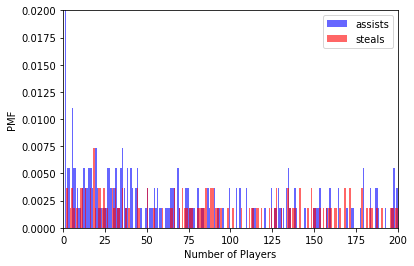

<Figure size 576x432 with 0 Axes>

In [58]:
points_pmf = thinkstats2.Pmf(points, label='assists')
minutes_pmf = thinkstats2.Pmf(minutes, label='steals')

thinkplot.PrePlot(2)
thinkplot.Hist(points_pmf, align='right', color='blue')
thinkplot.Hist(minutes_pmf, align='left', color='red')
thinkplot.Show(xlabel='Number of Players', ylabel='PMF',axis=[0,200,0,0.02])

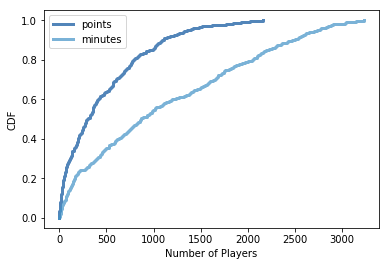

<Figure size 576x432 with 0 Axes>

In [59]:
points_cdf = thinkstats2.Cdf(points, label='points')
minutes_cdf = thinkstats2.Cdf(minutes, label='minutes')

thinkplot.PrePlot(2)
thinkplot.Cdfs([points_cdf, minutes_cdf])
thinkplot.Show(xlabel='Number of Players', ylabel='CDF')

In [60]:
#question5

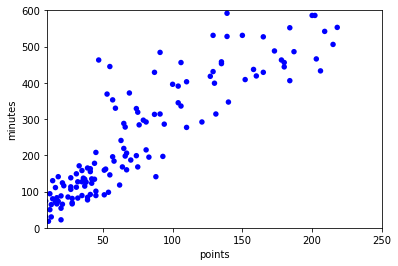

<Figure size 576x432 with 0 Axes>

In [62]:
# As seen in the graph there is a correlation between them
def ScatterPlot(points, minutes, alpha=1.0, s=20):

    thinkplot.Scatter(points, minutes, alpha=alpha)
    thinkplot.Show(xlabel='points',
                     ylabel='minutes',
                     xlim=[10, 250],
                     ylim=[0, 600],
                     legend=False)

ScatterPlot(points.head(400), minutes.head(400), alpha=1.0, s=10)

In [ ]:
#Question6

In [63]:

class HypothesisTest(object):

    def __init__(self, data):
        self.data = data
        self.MakeModel()
        self.actual = self.TestStatistic(data)

    def PValue(self, iters=2000):
        self.test_stats = [self.TestStatistic(self.RunModel()) 
                           for _ in range(iters)]

        count = sum(1 for x in self.test_stats if x >= self.actual)
        return count / iters

    def TestStatistic(self, data):
        raise UnimplementedMethodException()

    def MakeModel(self):
        pass

    def RunModel(self):
        raise UnimplementedMethodException()

In [64]:
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [66]:
Df_clean = Df_.dropna(subset=['points', 'minutes'])
data = Df_clean.points.values, Df_clean.minutes.values
ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue

0.0

In [69]:
#Test statistic is high so p value is low that mean statistical significance is high therefore null hypothesis can be rejected.
Test_stats_result=ht.actual
Test_stats_result

0.9352585828501251